# Breaking Silos

UN Datathon 2023

Sources:

- [CO2 Emissionen Gebäude](https://www.bafu.admin.ch/bafu/de/home/themen/klima/fachinformationen/verminderungsmassnahmen/gebaeude/co2-rechner-gebaeude.html#accordion1699022038096) (download .CSV format, unzip into the `data` folder)


In [3]:
import os
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
F_BUILDINGS = os.path.join('data', 'MAPGEO_GEB_CO2.txt')

# Read in the basic dataset
df_buildings = pd.read_csv(F_BUILDINGS, header=0, sep='\t')
'Loaded: %d rows' % (len(df_buildings))

'Loaded: 1790170 rows'

In [13]:
F_ADDRESSES = os.path.join('data', 'MAPGEO_DOM_CO2.txt')

# Read in the basic dataset
df_addresses = pd.read_csv(F_ADDRESSES, header=0, sep='\t')
'Loaded: %d rows' % (len(df_addresses))

'Loaded: 1861915 rows'

In [15]:
df_addresses.head(1)

,EGID,EDID,STRSP,DEXPDAT,STRNAME_DEINR,DPLZ4_DPLZNAME
0,564,0,DE,01.11.2023,Alte Hedingerstrasse 39,8910 Affoltern am Albis


In [23]:
# Clean up some columns we're not interested in
if 'LINKCO2' in df_buildings:
    df_buildings = df_buildings.drop('LINKCO2', axis=1)
if 'LINKBAFU' in df_buildings:
    df_buildings = df_buildings.drop('LINKBAFU', axis=1)
if 'LINKPDF' in df_buildings:
    df_buildings = df_buildings.drop('LINKPDF', axis=1)
if 'HINWEIS' in df_buildings:
    df_buildings = df_buildings.drop('HINWEIS', axis=1)
df_buildings.head(10)

,EGID,GKODE,GKODN,GSTAT,GKAT,GWAERZH1,GENH1,GWAERSCEH1,CO2_CLASS,CO2_RANGE,GUE20,GEXPDAT,DPLZ4_DPLZNAME
0,11513432,2679649.268,1237500.347,1004,1020,7430.0,7530.0,860.0,7,> 25,1,01.11.2023,NaN
1,11513433,2680637.900,1236936.229,1004,1020,7430.0,7530.0,860.0,7,> 25,1,01.11.2023,NaN
2,11517090,2679018.828,1235828.156,1004,1020,7431.0,7530.0,860.0,7,> 25,1,01.11.2023,NaN
3,1600000,2679679.869,1237453.256,1004,1020,7430.0,7530.0,869.0,7,> 25,1,01.11.2023,7460 Savognin
4,1600001,2679694.997,1237491.284,1004,1030,7436.0,7530.0,869.0,7,> 25,0,01.11.2023,7460 Savognin
5,1600002,2679723.955,1237479.329,1004,1030,7410.0,7598.0,869.0,1,0,0,01.11.2023,1977 Icogne
6,1600003,2679662.647,1237522.495,1004,1020,7431.0,7530.0,860.0,7,> 25,1,01.11.2023,9472 Grabs
7,1600005,2679754.242,1237530.436,1004,1020,7430.0,7530.0,860.0,7,> 25,1,01.11.2023,1982 Euseigne
8,1600006,2679710.185,1237543.854,1004,1020,7430.0,7540.0,860.0,1,0,1,01.11.2023,1982 Euseigne
9,1600007,2679684.826,1237581.429,1004,1020,7430.0,7530.0,860.0,7,> 25,1,01.11.2023,1987 Hérémence


In [21]:
df_buildings.describe()

,EGID,GKODE,GKODN,GSTAT,GKAT,GWAERZH1,GENH1,GWAERSCEH1,CO2_CLASS,HINWEIS,LINKPDF,LINKBAFU,GUE20
count,1.790170e+06,1.790170e+06,1.790170e+06,1790170.0,1.790170e+06,1.770285e+06,1.780202e+06,1.774575e+06,1.790170e+06,1790170.0,1790170.0,1790170.0,1.790170e+06
mean,4.930930e+07,2.646282e+06,1.205605e+06,1004.0,1.022000e+03,7.429139e+03,7.543536e+03,8.617364e+02,4.100689e+00,9999.0,9998.0,9997.0,4.912573e-01
std,9.322056e+07,6.849913e+04,5.226994e+04,0.0,4.985993e+00,1.252111e+01,2.805035e+01,4.910550e+00,2.997291e+00,0.0,0.0,0.0,4.999237e-01
min,1.000000e+00,2.486218e+06,1.075516e+06,1004.0,1.020000e+03,7.400000e+03,7.500000e+03,8.520000e+02,0.000000e+00,9999.0,9998.0,9997.0,0.000000e+00
25%,6.121722e+05,2.597050e+06,1.167842e+06,1004.0,1.020000e+03,7.430000e+03,7.530000e+03,8.600000e+02,1.000000e+00,9999.0,9998.0,9997.0,0.000000e+00
50%,1.336414e+06,2.648537e+06,1.219142e+06,1004.0,1.020000e+03,7.430000e+03,7.530000e+03,8.600000e+02,6.000000e+00,9999.0,9998.0,9997.0,0.000000e+00
75%,1.115185e+07,2.699783e+06,1.249809e+06,1004.0,1.020000e+03,7.431000e+03,7.560000e+03,8.690000e+02,7.000000e+00,9999.0,9998.0,9997.0,1.000000e+00
max,5.041850e+08,2.833434e+06,1.294815e+06,1004.0,1.040000e+03,7.499000e+03,7.599000e+03,8.710000e+02,7.000000e+00,9999.0,9998.0,9997.0,1.000000e+00


In [25]:
def trim_dataframe(df, col):
    return df[~((df[col] == 0) | (pd.isnull(df[col])))]

In [28]:
# Merge across the ID column
df_buildings.set_index('EGID')
df_addresses.set_index('EGID')
df_buildings['DPLZ4_DPLZNAME'] = df_buildings.EGID.map(df_addresses['DPLZ4_DPLZNAME'])
df_buildings = trim_dataframe(df_buildings, 'DPLZ4_DPLZNAME')

# Check how many unique locations we are talking about
df_buildings.nunique()['DPLZ4_DPLZNAME']

4051

In [39]:
# Generate a quick plot
df_locations = df_buildings.groupby(['DPLZ4_DPLZNAME']).size().sort_values(ascending=False)
df_locations.head()

DPLZ4_DPLZNAME
2502 Biel/Bienne          3720
2300 La Chaux-de-Fonds    3518
8610 Uster                3401
8500 Frauenfeld           3144
2503 Biel/Bienne          3020
dtype: int64

<Axes: title={'center': 'Postal codes with highest building density'}, ylabel='DPLZ4_DPLZNAME'>

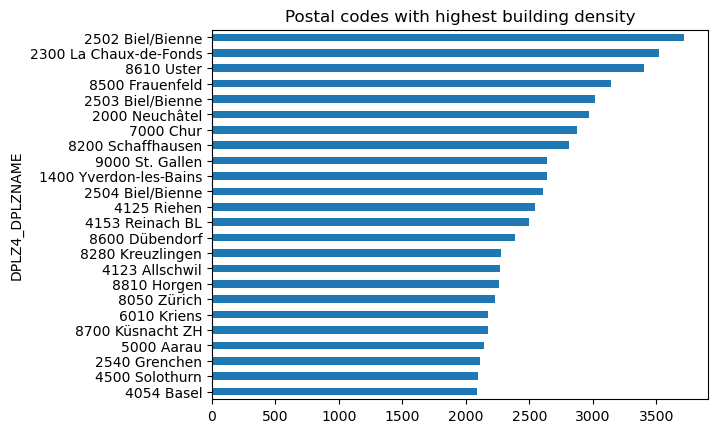

In [48]:
df_locations.head(24).sort_values().plot(title='Postal codes with highest building density', kind='barh', y=['DPLZ4_DPLZNAME'], legend=False)